In [5]:
url = 'https://raw.githubusercontent.com/leekyuyoungSandeateak/20220823_start_sandeateak/main/II%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data2.csv?token=GHSAT0AAAAAABZZF54CSRLC44C5AYHWK7EMY2HL5KQ'

In [6]:
# 확률을 계산 ->  1  2  3  4  5
# 다중분류       1  1  1  1  96
# 5

In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(url,index_col=0)
df.head()

,Weight,Length,Diagonal,Height,Width,type
72,5.9,8.4,8.8,2.1120,1.4080,A
73,32.0,13.7,14.7,3.5280,1.9992,A
74,40.0,15.0,16.0,3.8240,2.4320,A
75,51.5,16.2,17.2,4.5924,2.6316,A
76,70.0,17.4,18.5,4.5880,2.9415,A


In [9]:
df = df.reset_index(drop=True)
df.head()

,Weight,Length,Diagonal,Height,Width,type
0,5.9,8.4,8.8,2.1120,1.4080,A
1,32.0,13.7,14.7,3.5280,1.9992,A
2,40.0,15.0,16.0,3.8240,2.4320,A
3,51.5,16.2,17.2,4.5924,2.6316,A
4,70.0,17.4,18.5,4.5880,2.9415,A


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    159 non-null    float64
 1   Length    159 non-null    float64
 2   Diagonal  159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   type      159 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [11]:
df.describe(include='object')

,type
count,159
unique,7
top,A
freq,56


In [12]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [13]:
df['type'].value_counts()

A    56
B    35
C    20
D    17
E    14
F    11
G     6
Name: type, dtype: int64

In [14]:
typec_mean = df[df['type'] == 'C']['Weight'].mean()

In [15]:
df[df['Weight']==0]['Weight'] = typec_mean

In [16]:
df[df['Weight']==0].index

Int64Index([96], dtype='int64')

In [17]:
df.iloc[df[df['Weight']==0].index,0] = typec_mean

In [18]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,399.282704,28.415723,31.227044,8.970994,4.417486
std,357.109544,10.716328,11.610246,4.286208,1.685804
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


<AxesSubplot:>

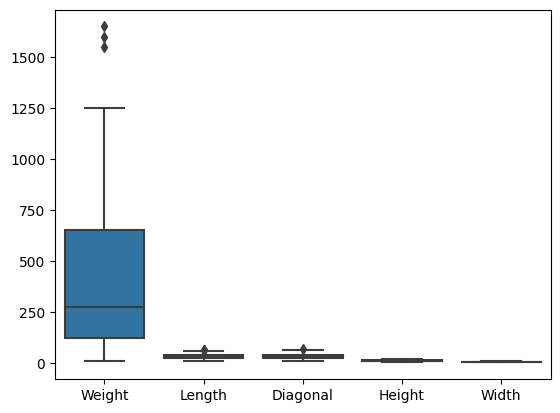

In [19]:
sns.boxplot(data=df)

In [21]:
# Weight 의 이상치 제거
IRQ = df['Weight'].quantile(0.75)-df['Weight'].quantile(0.25)
lower = df['Weight'].quantile(0.25) - IRQ
upper = df['Weight'].quantile(0.75) + IRQ 

In [29]:
df2 = df[(df['Weight'] > lower) &  (df['Weight'] < upper)]
df2.describe()

,Weight,Length,Diagonal,Height,Width
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,370.554516,27.604516,30.383226,8.939934,4.358886
std,311.755534,9.555969,10.468442,4.336074,1.664295
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,22.950000,5.926950,3.363600
50%,270.000000,26.500000,29.200000,7.615600,4.239000
75%,605.000000,35.000000,39.350000,12.379300,5.373200
max,1100.000000,51.700000,55.100000,18.957000,8.142000


In [31]:
df2['type'].value_counts()

A    56
B    35
C    20
E    14
D    13
F    11
G     6
Name: type, dtype: int64

In [32]:
# 학습데이터 / 정답데이터를 분리
# 넘파이로 변환한다음
# 표준화
# 데이터 분할
# 학습(적절한 머신러닝 모델 선택)

In [34]:
X = df2.iloc[:,:-1].to_numpy()
Y = df2.iloc[:,-1].to_numpy()

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss = StandardScaler()
x = ss.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test =  train_test_split(x,Y,random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
kn =  KNeighborsClassifier(n_neighbors=3)

In [74]:
# 학습
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
# 학습 테스트 데이터에 대해서 평가
kn.score(x_train,y_train), kn.score(x_test,y_test)

(0.8620689655172413, 0.7948717948717948)

In [76]:
# 분류모델.... 분류기 
kn.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [77]:
# 예측
kn.predict(x_test[:10]), y_test[:10]

(array(['B', 'F', 'A', 'A', 'D', 'B', 'A', 'B', 'A', 'B'], dtype=object),
 array(['B', 'F', 'A', 'A', 'D', 'B', 'C', 'F', 'G', 'B'], dtype=object))

In [78]:
# 분류--> 확률로 분류

In [79]:
print(f"{kn.classes_}")
print(f"{kn.predict_proba(x_test[:10])}")
print(f"{kn.predict(x_test[:10])}")
print(f"{y_test[:10]}")

['A' 'B' 'C' 'D' 'E' 'F' 'G']
[[0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.66666667 0.         0.33333333 0.         0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.66666667 0.         0.33333333 0.         0.         0.
  0.        ]
 [0.         0.66666667 0.         0.         0.         0.33333333
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]]
['B' 'F' 'A' 'A' 'D' 'B' 'A' 'B' 'A' 'B']
['B' 'F' 'A' 'A' 'D' 'B' 'C' 'F' 'G' 'B']


In [81]:
# 데이터를 두개의 그룹으로 분류하는 이진 분류 - 기본 : 로지스틱 회귀분석
# 예측값이 실수  y 의 값이  실수    
# 0 과 1의 값
# 선형회귀 - 직선의 방정식 - 보완... 활성화 함수   0 / 1 의 값을 갖도로고 보정  시그모이드 함수

In [95]:
x = [10,9,3,2,1,15,20]
y = [1,1,0,0,0,1,1]
data = np.stack((x,y))

In [96]:
data = data.T

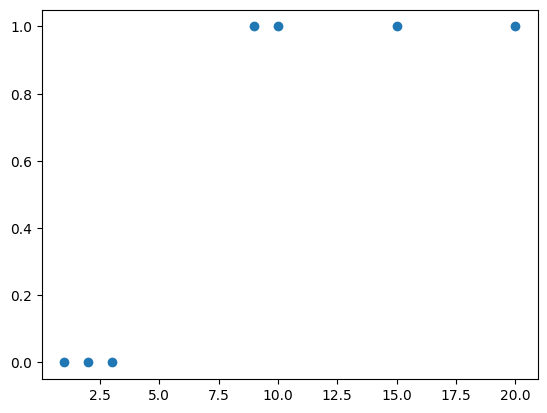

In [97]:
plt.scatter(x,y)

In [ ]:
# y = wx + b  
# 종속변수는 0, 1 
# Odds 확률(아즈, 오즈)
# 사건 A 가 발생할 확률
# p : 0, 1
# Odds(p) P / 1 - P  --> 범위는 (0,∞) 
# log(Odds(p)) :  범위 (-∞, ∞) : 실수전체에 대한 범위 선형회귀분석은 의미기 았다

In [98]:
# log(Odds(p)) = wx + b   
# p(x) = 
# 시그모이드 함수

In [100]:
z =  np.arange(-5,5,0.1)
px = 1 / (1 + np.exp(-z))

In [105]:
z = np.arange(-5)
np.exp(1)

2.718281828459045

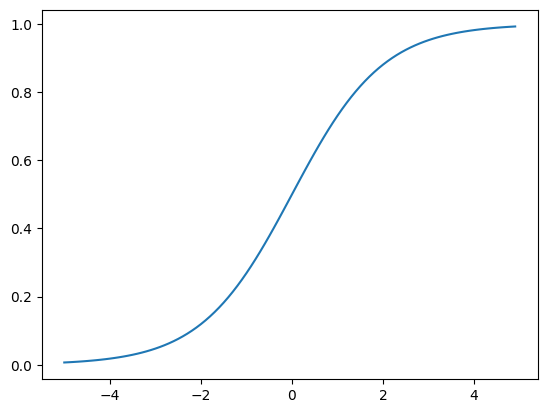

In [102]:
plt.plot(z,px)
plt.show()

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
# type A B인 데이터만 추출해서 새로운 데이터 셋을 구성
# binary_df

In [111]:
binary_df = df2[df2['type'].isin(['A','B'])]

In [115]:
# scale
# split
# 적용
# 평가
# 예측

In [118]:
binary_df['type'] = binary_df['type'].replace('A',1).replace('B',0)

In [122]:
X = binary_df.iloc[:,:-1]
Y = binary_df.iloc[:,-1]

In [126]:
#1 . Scaling
ss = StandardScaler()
X = ss.fit_transform(X)

In [127]:
# 데이터 분할
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42)

In [128]:
lr =  LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [130]:
lr.score(x_train,y_train), lr.score(x_test,y_test)

(1.0, 1.0)

In [131]:
lr.predict_proba(x_test[:10])

array([[0.10282091, 0.89717909],
       [0.02474598, 0.97525402],
       [0.12963521, 0.87036479],
       [0.97735059, 0.02264941],
       [0.01222298, 0.98777702],
       [0.05149886, 0.94850114],
       [0.0769835 , 0.9230165 ],
       [0.88362184, 0.11637816],
       [0.03952363, 0.96047637],
       [0.0635656 , 0.9364344 ]])

In [132]:
lr.coef_, lr.intercept_

(array([[ 0.44361281,  0.62100165, -0.60420428, -3.33632745,  0.90922758]]),
 array([0.77804017]))

In [133]:
lr.classes_

array([0, 1], dtype=int64)

In [134]:
# 학습된 데이터는 스켈일링 된 데이터 --> 모델을 만들었음
# 검증 및 예측을 할때. 사용하는 데이터는 일반데이터? 스케일링 한 데이터?
# 데이터의 특성..

In [137]:
# 데이터를 X, Y
# 분할
# 표준화 - 훈련데이터만
# 학습 - 훈련데이터만
# 평가 - 표준화되지  않은 원래 데이터로 평가

In [138]:
X = binary_df.iloc[:,:-1]
Y = binary_df.iloc[:,-1]

In [139]:
# 데이터 분할
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42)

In [141]:
x_train = ss.fit_transform(x_train)

In [142]:
lr.fit(x_train,y_train)

LogisticRegression()